In [12]:
#%matplotlib widget
import math
from collections import Counter

import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.linear_model import LinearRegression

In [13]:
df = pd.read_csv('../../data/DATA_2.csv', delimiter=',', parse_dates=['Datetime'])


In [14]:
from model import indicator

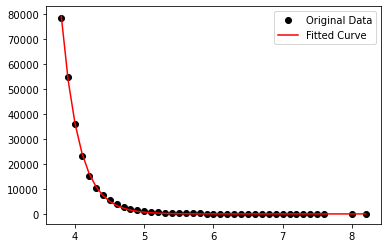